# Inferencia de RealERSGAN para mejorar imágenes de GSD 3.3 cm para detección

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/SUPERRESOLUTION')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SUPERRESOLUTION


In [2]:
#!unzip "/content/drive/MyDrive/SUPERRESOLUTION/images_3cm_areatest.zip" -d "/content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test"

Archive:  /content/drive/MyDrive/SUPERRESOLUTION/images_3cm_areatest.zip
replace /content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/images/tile_0_0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [3]:
!pip install numpy==1.24.4

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy
import shutil
from sklearn.model_selection import train_test_split
import os

In [5]:
#@title Leyendo las imagenes
Y = []

ruta = "/content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/images"
for archivo in os.listdir(ruta):
  Y.append(cv2.imread(os.path.join(ruta, archivo)))

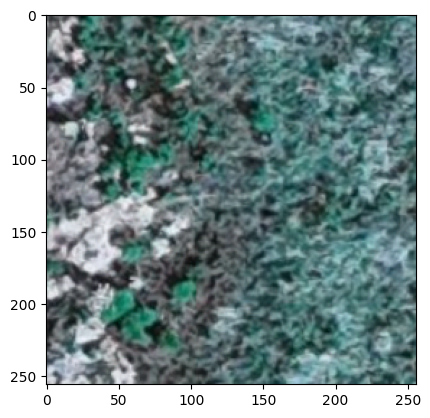

In [6]:
plt.imshow(Y[numpy.random.randint(0, len(Y))])

##Instalando requerimientos para REAL ESRGAN

In [7]:
%cd /content/drive/MyDrive/SUPERRESOLUTION/Real-ESRGAN

/content/drive/MyDrive/SUPERRESOLUTION/Real-ESRGAN


In [8]:
# Clone Real-ESRGAN and enter the Real-ESRGAN
#!git clone https://github.com/xinntao/Real-ESRGAN.git

# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_

Hay un error en la implementacion por un conflicto entre librerías, hay que descargar esta versión de basicsr y una versión mas antigua de torch y torchvision

In [9]:
!pip install torch==2.0.1 torchvision==0.15.2 --extra-index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 734.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.2.0
    Uninstalling triton-3.2.0:
      Successfully uninstalled triton-3.2.0
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages

In [10]:
!pip install basicsr-fixed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.7/173.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for basicsr-fixed: filename=basicsr_fixed-1.4.2-py3-none-any.whl size=220253 sha256=4bc8386d37f46fbc57052684836f791a961ba36644e0314f89fc53ab3eadd4b2
  Stored in directory: /root/.cache/pip/wheels/4f/e0/af/07494cc930129711f823f21d6612d31d072ab05a2ac0206c19
Successfully built basicsr-fixed


## Ahora si, usando Real ERSGAN

In [11]:
%cd /content/drive/MyDrive/SUPERRESOLUTION/Real-ESRGAN

/content/drive/MyDrive/SUPERRESOLUTION/Real-ESRGAN


Inference on pretrained weights

In [13]:
# if it is out of memory, try to use the `--tile` option
!python inference_realesrgan.py -n RealESRGAN_x4plus -i /content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/images -o /content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/reconstruct -s 2
#!python inference_realesrgan.py -n real_esrgan_trained1 -i /content/drive/MyDrive/SUPERRESOLUTION/mosaic_test_600/test -o /content/drive/MyDrive/SUPERRESOLUTION/mosaic_test_600/reconstruct
# Arguments
# -n, --model_name: Model names
# -i, --input: input folder or image

Testing 0 tile_0_0
Testing 1 tile_0_174
Testing 2 tile_0_348
Testing 3 tile_0_522
Testing 4 tile_0_696
Testing 5 tile_1044_0
Testing 6 tile_1044_174
Testing 7 tile_1044_348
Testing 8 tile_1044_522
Testing 9 tile_1044_696
Testing 10 tile_1044_870
Testing 11 tile_1218_0
Testing 12 tile_1218_174
Testing 13 tile_1218_348
Testing 14 tile_1218_522
Testing 15 tile_1218_696
Testing 16 tile_1218_870
Testing 17 tile_1392_0
Testing 18 tile_1392_174
Testing 19 tile_1392_348
Testing 20 tile_1392_522
Testing 21 tile_1392_696
Testing 22 tile_1392_870
Testing 23 tile_1566_0
Testing 24 tile_1566_174
Testing 25 tile_1566_348
Testing 26 tile_1566_522
Testing 27 tile_1566_696
Testing 28 tile_1566_870
Testing 29 tile_1740_0
Testing 30 tile_1740_174
Testing 31 tile_1740_348
Testing 32 tile_1740_522
Testing 33 tile_1740_696
Testing 34 tile_1740_870
Testing 35 tile_174_0
Testing 36 tile_174_1044
Testing 37 tile_174_174
Testing 38 tile_174_348
Testing 39 tile_174_522
Testing 40 tile_174_696
Testing 41 tile_174

Inference on trained model

In [14]:
!python my_inference_realesrgan.py -n RealESRGANx4 -i /content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/images -o /content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/reconstruct_train --model_path /content/drive/MyDrive/SUPERRESOLUTION/Real-ESRGAN/weights/finetune_RealESRGANx4plus_frailejones/real_esrgan_trained1.pth -s 2

Testing 0 tile_0_0
Testing 1 tile_0_174
Testing 2 tile_0_348
Testing 3 tile_0_522
Testing 4 tile_0_696
Testing 5 tile_1044_0
Testing 6 tile_1044_174
Testing 7 tile_1044_348
Testing 8 tile_1044_522
Testing 9 tile_1044_696
Testing 10 tile_1044_870
Testing 11 tile_1218_0
Testing 12 tile_1218_174
Testing 13 tile_1218_348
Testing 14 tile_1218_522
Testing 15 tile_1218_696
Testing 16 tile_1218_870
Testing 17 tile_1392_0
Testing 18 tile_1392_174
Testing 19 tile_1392_348
Testing 20 tile_1392_522
Testing 21 tile_1392_696
Testing 22 tile_1392_870
Testing 23 tile_1566_0
Testing 24 tile_1566_174
Testing 25 tile_1566_348
Testing 26 tile_1566_522
Testing 27 tile_1566_696
Testing 28 tile_1566_870
Testing 29 tile_1740_0
Testing 30 tile_1740_174
Testing 31 tile_1740_348
Testing 32 tile_1740_522
Testing 33 tile_1740_696
Testing 34 tile_1740_870
Testing 35 tile_174_0
Testing 36 tile_174_1044
Testing 37 tile_174_174
Testing 38 tile_174_348
Testing 39 tile_174_522
Testing 40 tile_174_696
Testing 41 tile_174

Vamos a ver los resultados de que tal se comporta

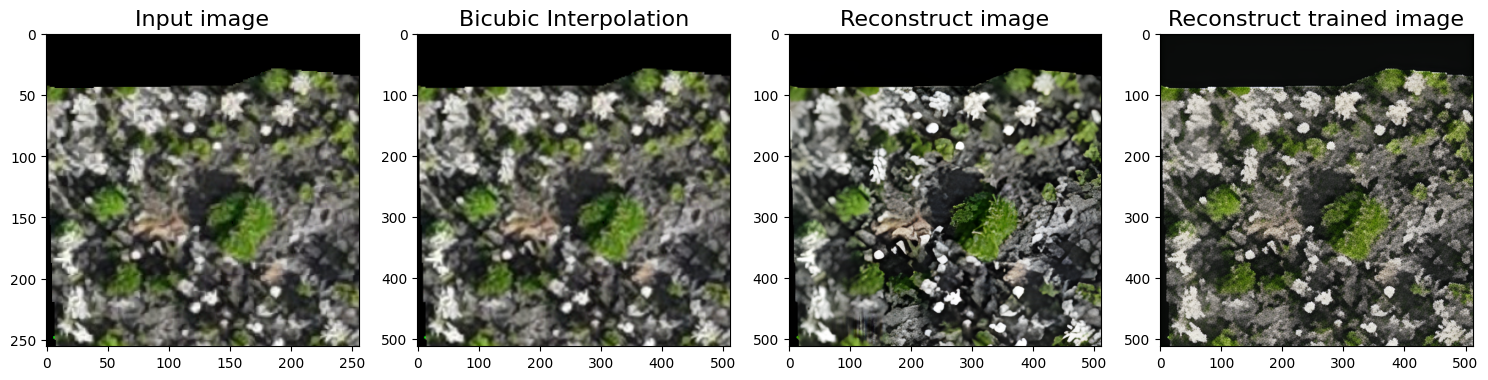

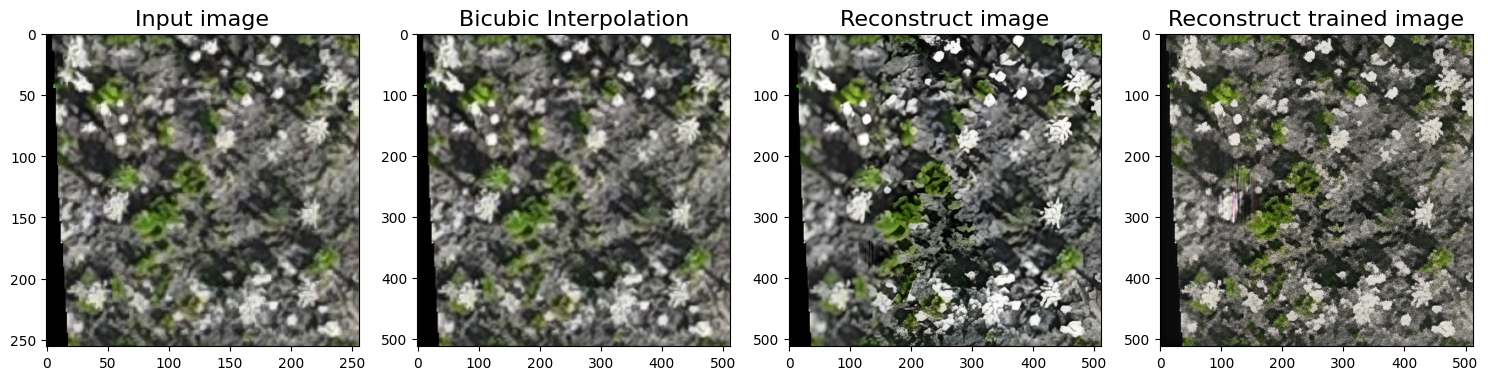

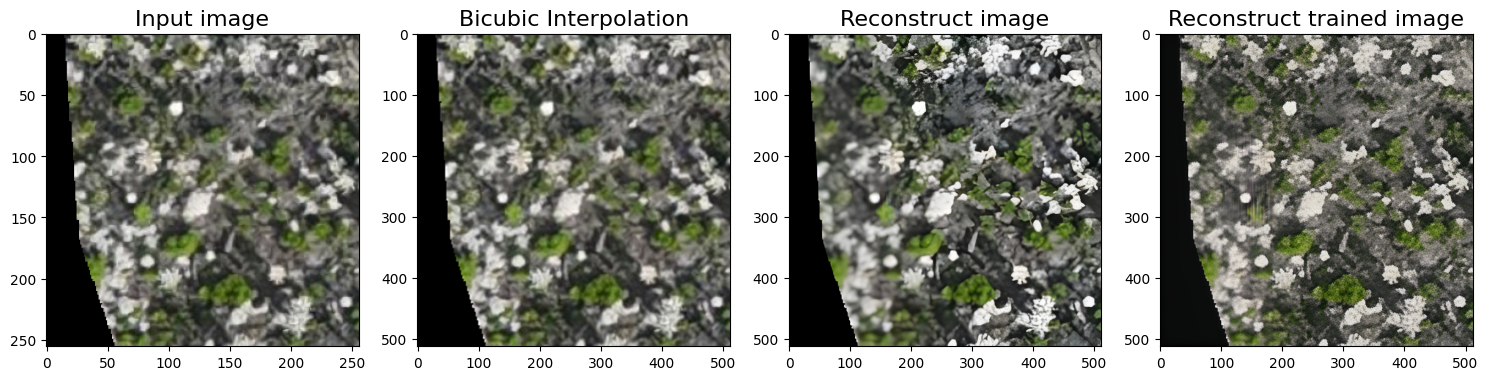

In [23]:
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

input_folder = "/content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/images"
reconstruct_folder = "/content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/reconstruct"
reconstruct_train_folder = "/content/drive/MyDrive/SUPERRESOLUTION/mosaic_3cm_test/reconstruct_train"

input_list = os.listdir(input_folder)
i = 0
for filename in input_list:
  img_input = imread(os.path.join(input_folder, filename))
  img_resized = cv2.resize(img_input, (512, 512), interpolation=cv2.INTER_CUBIC)
  img_reconstruct = imread(os.path.join(reconstruct_folder, filename.replace('.', '_out.')))
  img_reconstruct_train = imread(os.path.join(reconstruct_train_folder, filename.replace('.', '_out.')))
  plt.figure(figsize=(15, 10))
  plt.subplot(1, 4, 1);plt.title('Input image', fontsize=16);plt.imshow(img_input)
  plt.subplot(1, 4, 2);plt.title('Bicubic Interpolation', fontsize=16);plt.imshow(img_resized)
  plt.subplot(1, 4, 3);plt.title('Reconstruct image', fontsize=16);plt.imshow(img_reconstruct)
  plt.subplot(1, 4, 4);plt.title('Reconstruct trained image', fontsize=16);plt.imshow(img_reconstruct_train)
  plt.tight_layout()
  plt.show()
  i += 1
  if i == 3:
    break